In [ ]:
from platform import python_version

print(python_version())

In [ ]:
pip install joblib

In [ ]:
pip install cmake

In [ ]:
pip install dlib

In [ ]:
pip install opencv-python


In [3]:
pip install streamlit

In [ ]:
pip install numpy

In [ ]:
!pip install face_recognition

In [ ]:
pip install tqdm

In [ ]:
pip install sklearn

In [4]:
import tensorflow as tf
print(tf.test.is_gpu_available())


True


In [5]:
import dlib
dlib.DLIB_USE_CUDA

import numpy as np
import joblib
import pickle
import face_recognition
from sklearn import svm
import os


In [57]:
import face_recognition
from sklearn import svm
import os

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []

# Training directory
train_dir = os.listdir('C:/Users/Anuraag/Desktop/OLD OFFICE/FACE_REC_SVC/train_dir/')

In [58]:
from tqdm import tqdm
import time
start_time = time.time()
# Loop through each person in the training directory
for person in tqdm(train_dir):
    pix = os.listdir("C:/Users/Anuraag/Desktop/OLD OFFICE/FACE_REC_SVC/train_dir/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("C:/Users/Anuraag/Desktop/OLD OFFICE/FACE_REC_SVC/train_dir/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")

print("Done learning and creating profiles")
joblib.dump(encodings,"face_encoding")
joblib.dump(names,"name_encoding")
print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [02:23<00:00,  3.58s/it]

Done learning and creating profiles
--- 143.09603476524353 seconds ---


In [59]:
import numpy as np
import joblib
joblib.dump(encodings,"face_encoding")
joblib.dump(names,"name_encoding")

['name_encoding']

In [60]:
import time
start_time = time.time()
known_face_encodings = joblib.load("face_encoding")
known_name_encoding = joblib.load("name_encoding")
# Create and train the SVC classifier
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(known_face_encodings,known_name_encoding)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9599947929382324 seconds ---


In [62]:
pickle.dump(clf, open(filename, 'wb'))

In [61]:
filename = 'finalized_model.sav'

In [63]:
loaded_model = pickle.load(open(filename, 'rb'))


In [64]:
loaded_model

SVC(probability=True)

In [ ]:
joblib.dump(clf,"clf_model")

In [4]:
clf_model_final = joblib.load("clf_model")

In [5]:
clf_model_final

SVC(probability=True)

In [153]:
# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('rishav.jpg')

In [156]:
face_locations = face_recognition.face_locations(test_image)
face_locations


[(56, 145, 146, 56)]

In [152]:
# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

Number of faces detected:  1


EMPLOYEE -> anuraag


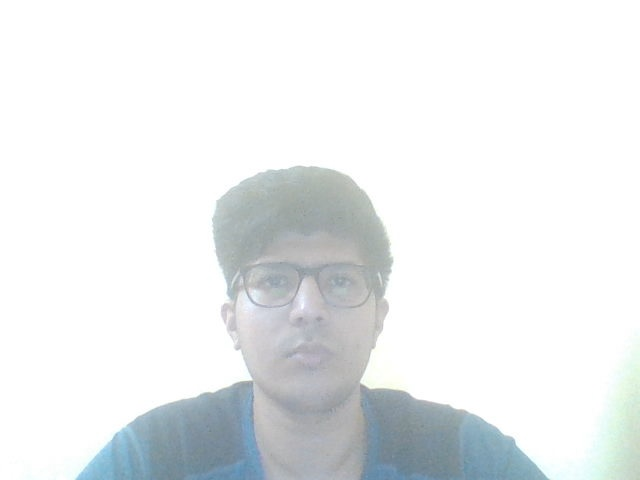

TIME TAKEN BY SCRIPT --- 0.2525362968444824 seconds ---
0.436648815788968


In [151]:
import time
from PIL import Image, ImageDraw
start_time = time.time()
import numpy as np
# Predict all the faces in the test image using the trained classifier
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]

thresh = loaded_model.predict_proba([test_image_enc])
thresh_updated = thresh*100
result = []

pil_image = Image.fromarray(test_image)
draw = ImageDraw.Draw(pil_image) 

for prob in thresh:
    if (prob > 0.1).any():
        result = np.where(prob > 0.1, True, False)
        """if result == True:
            
            res = [i for i, val in enumerate(result) if val]
            integers = res
            strings = [str(integer) for integer in integers]
            a_string = "".join(strings)
            an_integer = int(a_string)
            print(train_dir[an_integer])"""
        res = [i for i, val in enumerate(result) if val]
        integers = res
        strings = [str(integer) for integer in integers]
        a_string = "".join(strings)
        an_integer = int(a_string)
        print("EMPLOYEE"+" -> "+train_dir[an_integer])
    else:
        print("UNKNOWN USER")

display(pil_image)
print("TIME TAKEN BY SCRIPT --- %s seconds ---" % (time.time() - start_time))
print(thresh.max())

In [126]:
import cv2
videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imwrite("NewPicture.jpg",frame)
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()


In [ ]:
known_face_encodings = joblib.load("face_encoding")
known_name_encoding = joblib.load("name_encoding")

In [145]:
thresh

array([[0.03845203, 0.03050502, 0.01225078, 0.01084858, 0.01323938,
        0.02519889, 0.03387057, 0.02245617, 0.02644949, 0.01402205,
        0.02104565, 0.02339348, 0.03764776, 0.00910662, 0.02776572,
        0.01757502, 0.01719221, 0.01715519, 0.0256408 , 0.04108392,
        0.01639863, 0.01363376, 0.01066188, 0.01936482, 0.01972406,
        0.01145971, 0.03214608, 0.01691371, 0.02240852, 0.03570104,
        0.02565225, 0.01351674, 0.06207198, 0.03409841, 0.0619146 ,
        0.05095259, 0.00909296, 0.01760226, 0.01012427, 0.05166242]])

In [ ]:
known_name_encodings

In [ ]:
df_data = []
df_data.append(df[0][0:128])

In [ ]:
aa = loaded_model.predict_proba(df_data)
for i in aa:
    print(i)
len(aa)

In [ ]:
len(known_face_encodings[0])

In [ ]:
int(res)

In [ ]:
integers = res
strings = [str(integer) for integer in integers]
a_string = "".join(strings)
an_integer = int(a_string)
print(train_dir[an_integer])

In [ ]:
an_integer


In [ ]:
train_dir[an_integer]

In [ ]:
import inspect
print(inspect.getsource(face_recognition.face_distance))


In [ ]:
def predict_proba(self, X):
        X = self._validate_for_predict(X)
        if self.probA_.size == 0 or self.probB_.size == 0:
            raise NotFittedError("predict_proba is not available when fitted "
                                 "with probability=False")
        pred_proba = (self._sparse_predict_proba
                      if self._sparse else self._dense_predict_proba)
        return pred_proba(X)

In [ ]:
test_image_enc

In [ ]:
# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    print(*name)

In [ ]:
clf.predict_proba([test_image_enc])

In [ ]:
thresh = clf.predict_proba([test_image_enc])

In [ ]:
thresh

In [ ]:
record = []
for x in thresh:
    record.append(x)
        

In [ ]:
thresh = clf.predict_proba([test_image_enc])
for prob in thresh:
    if (prob > 0.1).any():
        name = clf.predict([test_image_enc])
        print(*name)
    else:
        print("UNKNOWN USER")

In [ ]:
face_locations

In [ ]:
known_name_encoding

In [ ]:
result = []
for x in thresh:
    result.append(x)

In [ ]:
type(result)

In [ ]:
train_dir

In [ ]:
list(zip(result,train_dir))

In [ ]:
print(result.join(train_dir))

In [ ]:
# Train multiple images per person
# Find and recognize faces in an image using a SVC with scikit-learn

"""
Structure:
        <test_image>.jpg
        <train_dir>/
            <person_1>/
                <person_1_face-1>.jpg
                <person_1_face-2>.jpg
                .
                .
                <person_1_face-n>.jpg
           <person_2>/
                <person_2_face-1>.jpg
                <person_2_face-2>.jpg
                .
                .
                <person_2_face-n>.jpg
            .
            .
            <person_n>/
                <person_n_face-1>.jpg
                <person_n_face-2>.jpg
                .
                .
                <person_n_face-n>.jpg
"""

import face_recognition
from sklearn import svm
import os

# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []

# Training directory
train_dir = os.listdir('C:/Users/Anuraag/Desktop/FACE_REC_SVC/train_dir/')

# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir("C:/Users/Anuraag/Desktop/FACE_REC_SVC/train_dir/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("C:/Users/Anuraag/Desktop/FACE_REC_SVC/train_dir/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")

# Create and train the SVC classifier
clf = svm.SVC(gamma='scale')
clf.fit(encodings,names)

# Load the test image with unknown faces into a numpy array
test_image = face_recognition.load_image_file('test_image.jpg')

# Find all the faces in the test image using the default HOG-based model
face_locations = face_recognition.face_locations(test_image)
no = len(face_locations)
print("Number of faces detected: ", no)

# Predict all the faces in the test image using the trained classifier
print("Found:")
for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    print(*name)